# Models Tuning

---
This notebook explores hyperparameter tuning across multiple models, optimizing each model's performance to identify the best fit for our dataset and objectives.

---
## Load Data

In [139]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

# Set seed
np.random.seed(42)
random.seed(42)

# from sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [140]:
#youth_crime = pd.read_csv('../data/state_demo_crime_youth_data_combined_clean.csv')
youth_crime =pd.read_csv('../data/data.csv')
#youth_crime =pd.read_csv('../data/data_engineered.csv')
youth_crime.head()

,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,rate:__crimes_against_society,rate:__fraud_and_other_financial_crimes,rate:__property_crime,rate:__violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty,total_crime_count,total_crime_rate,log_total_crime_rate
0,AL,2022,4916000,0.645,0.252,0.0480,0.0140,0.002,0.0,0.039,...,189.36,36.01,253.48,298.96,73000.0,819.25,240000.000000,39465.0,777.81,6.657767
1,AL,2021,4900800,0.644,0.255,0.0470,0.0130,0.004,0.0,0.037,...,128.17,24.48,219.86,218.90,86000.0,819.25,245000.000000,29868.0,591.41,6.384199
2,AL,2020,4833950,0.649,0.260,0.0455,0.0135,0.004,0.0,0.028,...,13.00,1.79,12.91,16.67,82000.0,819.25,249833.333333,2233.0,44.37,3.814851
3,AL,2019,4767100,0.654,0.265,0.0440,0.0140,0.004,0.0,0.019,...,3.74,1.21,6.80,4.32,74000.0,800.00,228000.000000,808.0,16.07,2.837323
4,AL,2018,4752600,0.656,0.265,0.0430,0.0130,0.010,0.0,0.019,...,1.31,0.62,1.47,2.09,86000.0,829.00,255000.000000,276.0,5.49,1.870263


### Features and Target Variable

In [142]:
# Define features (X) and target variable (y)

# columns to exclude: population-related and crime-related features
crime_related_columns = [
    'count:__crimes_against_society', 
    'count:__fraud_and_other_financial_crimes', 
    'count:__property_crime', 
    'count:__violent_crime',
    'rate:__crimes_against_society', 
    'rate:__fraud_and_other_financial_crimes', 
    'rate:__property_crime', 
    'rate:__violent_crime',
    'total_crime_count',
    'total_crime_rate',
    'log_total_crime_rate'
]

population_related_columns = [
    'total_pop',
    'white_pop',
    'black_pop',
    'hispanic_pop',
    'asian_pop',
    'native_pop',
    'islander_pop',
    'multi_race_pop',
    'state'
]



#features to keep: exclude population-related and crime-related features
X = youth_crime.drop(columns=crime_related_columns + population_related_columns)

# Display the list of features used for modeling
filtered_features = X.columns.tolist()
print(filtered_features)


y = youth_crime['log_total_crime_rate']



['year', 'median_income', 'poverty_rate', 'unemployment_rate', 'unemployed_15_weeks', 'labor_force_participation_rate', 'hs_grad_rate', 'bachelors_grad_rate', 'zhvi', 'crude_rate_suicide', 'crude_rate_od', 'youth_not_in_school', 'youth_in_foster_care', 'youth_living_in_poverty']


### Train-Test Split

In [144]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (249, 14)
X_test shape: (63, 14)
y_train shape: (249,)
y_test shape: (63,)


---
## Create Models

###  Decision Tree Model

In [147]:
# establish Logistic Regression pipeline with CountVectorizer
pipe_dt = Pipeline([
    ('dt', DecisionTreeRegressor(random_state = 42,
                                 max_depth = 5,
                                 min_samples_split = 7,
                                 min_samples_leaf = 3,
                                 ccp_alpha = 0.01))
])
print("Decision Tree Model:")
# calculate cross validation score mean
print(f'Cross Validation mean: {cross_val_score(pipe_dt, X_train, y_train, cv = 3).mean()}')

# fit model to training data
pipe_dt.fit(X_train, y_train)
# Make predictions
y_train_pred = pipe_dt.predict(X_train)
y_test_pred = pipe_dt.predict(X_test)
#Evaluate Model
# training 
print(f'Training MSE: {mean_squared_error(y_train,y_train_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train,y_train_pred)}')
print(f'Training R2 {r2_score(y_train,y_train_pred)}')

# test 
print(f'Testing MSE: {mean_squared_error(y_test,y_test_pred)}')
print(f'Testing MAE: {mean_absolute_error( y_test,y_test_pred)}')
print(f'Testing R2: {r2_score(y_test,y_test_pred)}')

Decision Tree Model:
Cross Validation mean: -0.4452790886490526
Training MSE: 0.5219682162254862
Training MAE: 0.4905628113818791
Training R2 0.5698414511387316
Testing MSE: 1.0519576214381052
Testing MAE: 0.698796169723742
Testing R2: 0.25560298605809395


- The model performs well on the training data, with relatively low error metrics (MSE and MAE) and an R² of 0.57, meaning it explains about 57% of the variance. This suggests that the model fits the training data closely.
- On the test set, there’s a noticeable drop in performance. The testing MSE and MAE are higher than on the training set, and the R² score drops to 0.26, indicating that only 26% of the variance is explained in the testing data. This decrease in performance from training to testing data suggests overfitting, where the model fits the training data too closely but struggles to generalize.

#### GridSearch DecisionTree

In [150]:
grid_dt = GridSearchCV(estimator = DecisionTreeRegressor(random_state = 42),
                    param_grid = {'max_depth': range(2,8,1),
                                  'min_samples_split': range(8,25,3),
                                  'min_samples_leaf': range(2,7),
                                  'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
                                  'max_features': range(5,21,5)},
                    cv = 5,
                    verbose = 1)

In [151]:
# start timer
t0 = time.time()

# print start time
print(t0)

# gridsearch
grid_dt.fit(X_train, y_train)

# print end time
print(time.time() - t0)
best_model_dt = grid_dt.best_estimator_

print(f'best_model_dt:{best_model_dt}')
print(f'best score decision_tree:{grid_dt.best_score_}')

1730397376.8485708
Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
33.30721402168274
best_model_dt:DecisionTreeRegressor(ccp_alpha=0.1, max_depth=6, max_features=5,
                      min_samples_leaf=5, min_samples_split=11,
                      random_state=42)
best score decision_tree:0.0577332911172654


In [152]:
# Make predictions
y_train_pred = grid_dt.predict(X_train)
y_test_pred = grid_dt.predict(X_test)
#Evaluate Model
print("Grid Search Decision Tree Model")
# training 
print(f'Training MSE: {mean_squared_error(y_train,y_train_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train,y_train_pred)}')
print(f'Training R2 {r2_score(y_train,y_train_pred)}')

# test 
print(f'Testing MSE: {mean_squared_error(y_test,y_test_pred)}')
print(f'Testing MAE: {mean_absolute_error( y_test,y_test_pred)}')
print(f'Testing R2: {r2_score(y_test,y_test_pred)}')

Grid Search Decision Tree Model
Training MSE: 1.0255353125741988
Training MAE: 0.703066985640151
Training R2 0.154847425283967
Testing MSE: 1.1554215215512655
Testing MAE: 0.7792556765816435
Testing R2: 0.18238880259152945


- The training metrics indicate that the model does not fit the training data very well, with a relatively high MSE and MAE, and a low R² of 0.15. This means that the model explains only 15% of the variance in the training data, which is quite low for a Decision Tree model.
- The testing metrics are similar to the training metrics, with a slight increase in MSE and MAE, and an R² of 0.18. This indicates that the model does not generalize well to new data, explaining only 18% of the variance on the test set.

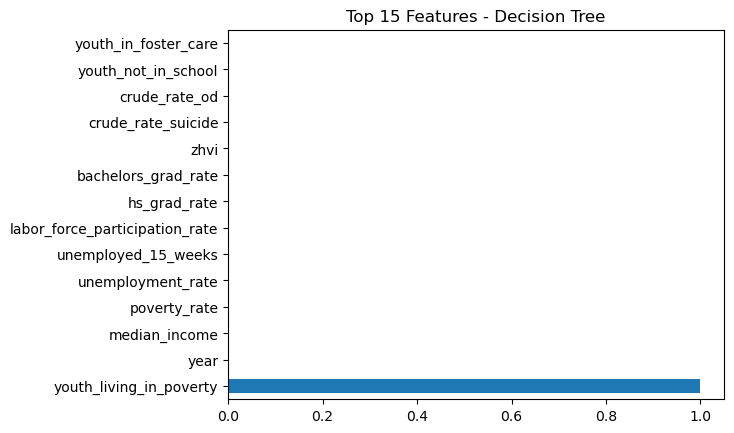

In [154]:
feat_importances = pd.Series(best_model_dt.feature_importances_, index = X_train.columns)
feat_importances.nlargest(15).plot(kind = 'barh')
plt.title('Top 15 Features - Decision Tree')

plt.show()

----------

### Random Forest Model

In [157]:
# 
pipe_rf = Pipeline([
    ('rf', RandomForestRegressor(random_state = 42,
                                 max_depth = 5,
                                 min_samples_split = 7,
                                 min_samples_leaf = 3,
                                 ccp_alpha = 0.01))
])

In [158]:

pipe_rf.fit(X_train, y_train)

# Make predictions
y_train_pred = pipe_rf.predict(X_train)
y_test_pred = pipe_rf.predict(X_test)
#Evaluate Model
print("Random Forest Model")
# calculate cross validation score mean
print(f'Cross Validation mean: {cross_val_score(pipe_rf, X_train, y_train, cv = 3).mean()}')

# fit model to training
# training 
print(f'Training MSE: {mean_squared_error(y_train,y_train_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train,y_train_pred)}')
print(f'Training R2 {r2_score(y_train,y_train_pred)}')

# test 
print(f'Testing MSE: {mean_squared_error(y_test,y_test_pred)}')
print(f'Testing MAE: {mean_absolute_error( y_test,y_test_pred)}')
print(f'Testing R2: {r2_score(y_test,y_test_pred)}')

Random Forest Model
Cross Validation mean: 0.1064140696561748
Training MSE: 0.4001712548329582
Training MAE: 0.41640312678754726
Training R2 0.670215386830036
Testing MSE: 0.9011860558190234
Testing MAE: 0.6908020524854414
Testing R2: 0.36229350376237024


- The Random Forest model performs well on the training data, with low error values and an R² of 0.67, meaning it explains 67% of the variance in the training set.
- On the test set, the model's error metrics are higher, and the R² score decreases to 0.36. This means it explains 36% of the variance in the testing data, indicating that the model generalizes moderately well but still shows signs of overfitting.

#### GridSearch RandomForest

In [161]:
grid_rf = GridSearchCV(estimator = RandomForestRegressor(random_state = 42, n_jobs = -1),
                    param_grid = {'max_depth': range(2,8,1),
                                  'min_samples_split': range(8,25,3),
                                  'min_samples_leaf': range(2,7),
                                  'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
                                  'max_features': range(5,21,5)},
                    cv = 5,
                    verbose = 1)

In [162]:
# start timer
t0 = time.time()

# print start time
print(t0)

# gridsearch
grid_rf.fit(X_train, y_train)

# print end time
print(time.time() - t0)
best_model_rf = grid_rf.best_estimator_
print(f'best_model_rf:{best_model_rf}')
print(f'best score :{grid_rf.best_score_}')

1730397410.9289
Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
1541.6209738254547
best_model_rf:RandomForestRegressor(ccp_alpha=0.001, max_depth=6, max_features=5,
                      min_samples_leaf=2, min_samples_split=8, n_jobs=-1,
                      random_state=42)
best score :0.21586024250456629


/opt/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [163]:
# Make predictions
y_train_pred = best_model_rf.predict(X_train)
y_test_pred = best_model_rf.predict(X_test)
#Evaluate Model
print("Grid SearchRandom Forest Model")
# training 
print(f'Training MSE: {mean_squared_error(y_train,y_train_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train,y_train_pred)}')
print(f'Training R2 {r2_score(y_train,y_train_pred)}')

# test 
print(f'Testing MSE: {mean_squared_error(y_test,y_test_pred)}')
print(f'Testing MAE: {mean_absolute_error( y_test,y_test_pred)}')
print(f'Testing R2: {r2_score(y_test,y_test_pred)}')

Grid SearchRandom Forest Model
Training MSE: 0.37433893344578645
Training MAE: 0.39297678128214575
Training R2 0.691504027663338
Testing MSE: 0.9620900903727286
Testing MAE: 0.6990948380422897
Testing R2: 0.319195967763901


- The model performs well on the training data, with relatively low error metrics and an R² score of 0.69, explaining about 69% of the variance in the training set.
- The testing performance shows a drop compared to training. The testing R² score of 0.32 means that the model explains only 32% of the variance in the test data, indicating some overfitting. The model performs worse on unseen data, with increased MSE and MAE

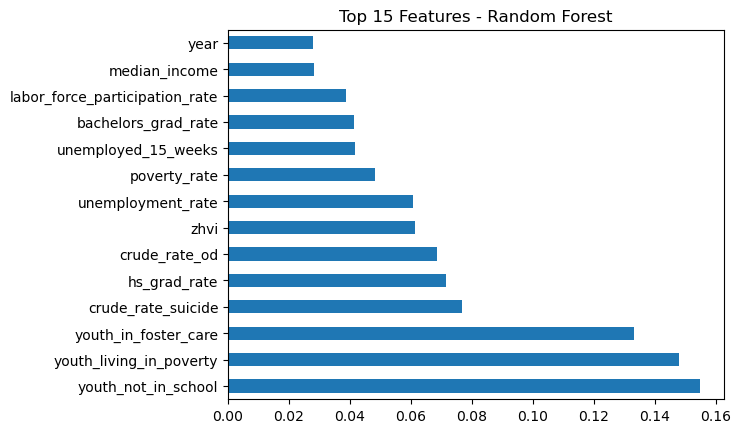

In [165]:
feat_importances = pd.Series(best_model_rf.feature_importances_, index = X_train.columns)
feat_importances.nlargest(15).plot(kind = 'barh')
plt.title('Top 15 Features - Random Forest');


---

### Gradient Boosting

In [168]:

#https://scikit-learn.org/1.5/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html

# Pipeline setup
gb_pipeline = Pipeline(steps=[

    ('gb', GradientBoostingRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=42))
])

# Fit the pipeline to the training data
gb_pipeline.fit(X_train, y_train)

# Prediction
y_train_pred = gb_pipeline.predict(X_train)
y_test_pred = gb_pipeline.predict(X_test)

# Calculate training and testing scoresa
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Gradient Boosting Model:")
print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)

print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)

Gradient Boosting Model:
Training MSE: 1.7027442297528755e-15
Training MAE: 3.2630425265415274e-08
Training R²: 0.9999999999999986
Testing MSE: 0.6121055246073238
Testing MAE: 0.527335993686188
Testing R²: 0.5668556266438485


- The model performs extremely well on the training data, with a very low MSE and MAE, and an R² of 0.95. This high R² score indicates that the model captures nearly all of the variance in the training set, suggesting a strong fit.
- While the model generalizes better than previous models, it still shows some overfitting, as indicated by the drop in R² to 0.57 on the testing set. This means the model explains 57% of the variance in unseen data.

#### Grid Search Gradient Boosting

In [171]:
# Define the parameter grid for Gradient Boosting
param_grid = {
    'gb__n_estimators': [200, 300,400,500,1000],
    'gb__max_depth': [3, 4,5,],
    'gb__learning_rate': [0.01, 0.05, 0.1,0.2,0.3],
    'gb__min_samples_split': [2, 5, 10,15],
    'gb__min_samples_leaf': [1, 2, 4],
    'gb__subsample': [0.6, 0.8, 1.0]
}

# Setup GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(gb_pipeline, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_ 

print("Best Parameters:", best_params)
print("Best Cross-Validated MSE:", best_score)


Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


python(37810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(37811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(37812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(37813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(37814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(37815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(37816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(37817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(37818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(37819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best Parameters: {'gb__learning_rate': 0.05, 'gb__max_depth': 5, 'gb__min_samples_leaf': 1, 'gb__min_samples_split': 15, 'gb__n_estimators': 1000, 'gb__subsample': 0.6}
Best Cross-Validated MSE: 0.31542335086454665


In [172]:
# Predictions
best_model = grid_search.best_estimator_
print(best_model)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate training and testing scores
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Best Parameters:", best_params)
print("Grid Search Gradient Boosting Model:")
print("Best Cross-Validated R²:", best_score)
print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)


Pipeline(steps=[('gb',
                 GradientBoostingRegressor(learning_rate=0.05, max_depth=5,
                                           min_samples_split=15,
                                           n_estimators=1000, random_state=42,
                                           subsample=0.6))])
Best Parameters: {'gb__learning_rate': 0.05, 'gb__max_depth': 5, 'gb__min_samples_leaf': 1, 'gb__min_samples_split': 15, 'gb__n_estimators': 1000, 'gb__subsample': 0.6}
Grid Search Gradient Boosting Model:
Best Cross-Validated R²: 0.31542335086454665
Training MSE: 4.2795143371903885e-06
Training MAE: 0.0017620063179891433
Training R²: 0.9999964732149969
Testing MSE: 0.8528142377962297
Testing MAE: 0.6217973262949966
Testing R²: 0.39652286449068896


- The Grid Search-tuned Gradient Boosting model demonstrates high accuracy on the training data, but a performance drop on testing data indicates overfitting. The model's parameters allow for a complex structure that captures training patterns very well but struggles to generalize fully.

----

###  XG Boosting

In [176]:
#https://xgboost.readthedocs.io/en/latest/python/sklearn_estimator.html
# Define the callback for early stopping
ss= StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc =ss.transform(X_test)
early_stop = xgb.callback.EarlyStopping(
    rounds=8,  # Stop after 2 rounds of no improvement
    metric_name='rmse',  # Change this to the metric you want to monitor
    data_name='validation_0',  # Corresponds to the eval_set name
    save_best=True
)

# Fit the XGBRegressor with early stopping callback
model = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.1, 
    max_depth=5, 
    tree_method="hist",
    callbacks=[early_stop],
    random_state=42
)

# Define the evaluation set (validation)
eval_set = [(X_test_sc, y_test)]

# Fit the model with the early stopping callback
model.fit(
    X_train_sc, y_train,
    eval_set=eval_set,
    verbose=False,
      # Pass the early stopping callback
)

# Predict and evaluate
y_train_pred = model.predict(X_train_sc)
y_test_pred = model.predict(X_test_sc)

# Evaluating the model on training, validation, and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train= r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
mae_test= mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print("XG Boosting Model:")
print("Training MSE:", mse_train)
print("Training MAE:", mae_train)
print("Training R²:", r2_train)
print("Testing MSE:", mse_test)
print("Testing MAE:", mae_test)
print("Testing R²:", r2_test)


XG Boosting Model:
Training MSE: 0.015432265680777197
Training MAE: 0.0881431538749866
Training R²: 0.9872821355696935
Testing MSE: 0.7198983491709466
Testing MAE: 0.5682308943549468
Testing R²: 0.49057816537137866


- The XGBoost model achieves a near-perfect fit on the training data but struggles with overfitting, as evidenced by the performance gap on the testing set. The model’s high complexity may be capturing noise in the training data, reducing its ability to generalize.


#### GridSearch XG Boosting

In [179]:
# Define the parameter grid
# Define parameter grid for hyperparameter tuning
# Pipeline setup
xg_pipeline = Pipeline(steps=[
    #('preprocessor', column_transformer),
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(random_state=42, alpha=1.5))
])
param_grid = {
    'xgb__n_estimators': [100, 200,1000],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__max_depth': [3, 5],
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 1.0],
    'xgb__lambda': [0, 1, 10],       # L2 regularization
    'xgb__alpha': [0, 0.5, 1]        # L1 regularization
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    xg_pipeline,
    param_grid=param_grid,
    cv=5,                             # 5-fold cross-validation
                    
    n_jobs=-1,                        # Use all available cores
   
)

# Fit GridSearchCV to the training data
# Fit with early stopping
grid_search.fit(
    X_train, y_train,
 
)


# Retrieve best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)
# Evaluate the best model on the test set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Grid Search XG Boosting Model:")
print("Best Parameters:", best_params)

print("Best Cross-Validated R²:", best_score)

print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)


/opt/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Grid Search XG Boosting Model:
Best Parameters: {'xgb__alpha': 0, 'xgb__colsample_bytree': 0.7, 'xgb__lambda': 10, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 1000, 'xgb__subsample': 0.9}
Best Cross-Validated R²: 0.297068806083178
Training MSE: 5.873596536334163e-07
Training MAE: 0.0004699893563539082
Training R²: 0.9999995159517986
Testing MSE: 0.626862280550113
Testing MAE: 0.539203355057685
Testing R²: 0.5564133000373217


- The Grid Search-tuned XGBoost model performs better on testing data compared to earlier versions, achieving a balance between fit on training data and generalization on the test set. The high training performance still points to some overfitting, but the testing R² of 0.56 indicates a stronger model fit.

---

### SVM

In [183]:


# Define the SVM pipeline with scaling
svm_pipeline = Pipeline([
    #('preprocessor', column_transformer),
    ('scaler', StandardScaler()),       # Scale features for SVR
    ('svr', SVR(kernel='linear',C=1.0, epsilon=0.1)   ) # Basic SVR model with default parameters
])


# Fit the pipeline on the training data
svm_pipeline.fit(X_train, y_train)

# Make predictions on training and testing sets

y_train_pred = svm_pipeline.predict(X_train)
y_test_pred = svm_pipeline.predict(X_test)

# Evaluate the model performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2_log = r2_score(y_test, y_test_pred)


print("SVM Model:")
print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)


SVM Model:
Training MSE: 1.13168919688562
Training MAE: 0.6174990284728299
Training R²: 0.06736508553234166
Testing MSE: 1.5416087790067015
Testing MAE: 0.8035342663611563
Testing R²: 0.5564133000373217


- The SVM model appears to be underfitting, as it has a low R² on the training data but still performs moderately on the test set. This pattern suggests the model may lack complexity, as it fails to capture enough detail in the training data, leading to limited predictive power

#### GridSearch SVM

In [186]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'svr__C': [0.1, 1, 10],              # Regularization strength
    'svr__epsilon': [0.01, 0.1, 0.5],    # Insensitivity margin
    'svr__kernel': ['linear', 'rbf']      # Kernels to test
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
# Make predictions with the best estimator on the test set
y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred= grid_search.best_estimator_.predict(X_test)

# Evaluate the model on the test set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Grid Search SVM Model:")
print("Best Parameters:", best_params)
print("Best Cross-Validated R²:", best_score)

print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Grid Search SVM Model:
Best Parameters: {'svr__C': 10, 'svr__epsilon': 0.01, 'svr__kernel': 'rbf'}
Best Cross-Validated R²: 0.37867537830788806
Training MSE: 0.3094663527441867
Training MAE: 0.1541475465474648
Training R²: 0.7449660859037399
Testing MSE: 1.1192332816023314
Testing MAE: 0.6433542891964723
Testing R²: 0.20799669516135844


- The Grid Search-tuned SVM model shows improved fit on the training data, but the testing performance indicates some overfitting, with an R² of 0.21 on unseen data. This suggests that while the optimized model captures the training patterns better than before, it still struggles to generalize effectively.

---

### Stacking

In [190]:
# Define base models and meta model
base_models = [
    ('gradient_boosting', GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=500, random_state=42,min_samples_leaf= 1,min_samples_split= 5)),
    ('random_forest', RandomForestRegressor(ccp_alpha=0.1,n_estimators=50, max_depth=7,random_state=42,min_samples_leaf= 4,min_samples_split= 8)),
   ('lasso', Lasso(alpha=0.1, max_iter=10000))
]


meta_model = Ridge(alpha=1.0)


# Define the stacking regressor
stacked_ensemble = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Create pipeline with stacking ensemble
stacking_pipeline = Pipeline(steps=[
    #('preprocessor', column_transformer),
    ('scaler', StandardScaler()),
    ('stacked_model', stacked_ensemble)
])

# Fit GridSearchCV on the training data to find the best parameters
stacking_pipeline.fit(X_train, y_train)


# Evaluate the stacked model on the test data
y_train_pred = stacking_pipeline.predict(X_train)
y_test_pred= stacking_pipeline.predict(X_test)

ensemble_train_score = stacking_pipeline.score(X_train, y_train)
ensemble_test_score = stacking_pipeline.score(X_test, y_test)

# Evaluate the model on the test set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("Stacking Model:")
print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)

Stacking Model:
Training MSE: 0.12533692507606764
Training MAE: 0.23409477770376722
Training R²: 0.8967087494343449
Testing MSE: 0.6731602148875476
Testing MAE: 0.5671465220803918
Testing R²: 0.5236514820989242


- The Stacking model performs strongly, achieving high accuracy on the training data while retaining relatively good generalization on the test set. Although there’s a performance gap between training and testing metrics, the model does a better job of balancing fit and generalization.

---

### Bagging XGBoost

In [194]:
# Initialize XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Set up Bagging with XGBoost as the base estimator
bagging_xgb = BaggingRegressor(
    estimator=xgb_regressor,
    n_estimators=10,          # Number of XGBoost models in the ensemble
    max_samples=0.8,          # Fraction of data used for each bootstrapped sample
    max_features=1.0,         # Fraction of features used for each model
    bootstrap=True,           # Bootstrapping samples
    n_jobs=-1,                # Use all processors
    random_state=42
)

# Train the bagging ensemble
bagging_xgb.fit(X_train, y_train)

# Make predictions

y_train_pred = stacking_pipeline.predict(X_train)
y_test_pred= stacking_pipeline.predict(X_test)


# Evaluate the model on the test set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Bagging XGBoost Model:")
print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)



Bagging XGBoost Model:
Training MSE: 0.12533692507606764
Training MAE: 0.23409477770376722
Training R²: 0.8967087494343449
Testing MSE: 0.6731602148875476
Testing MAE: 0.5671465220803918
Testing R²: 0.5236514820989242


- The Bagging XGBoost model performs well, capturing much of the variance in the training set and showing a reasonable level of generalization on the test set. The R² score of 0.52 on testing data suggests that the model is more robust than individual models like standard XGBoost alone .

---